In [6]:
#Import Dependencies
import pandas as pd
import json
import requests
import time
import numpy as np
import matplotlib.pyplot as plt
from config import api_key
from pprint import pprint

#Create Output File (CSV)
output_data_file = "output_data/cities.csv"

In [7]:
#Use CityPy to generate list of cities for weather data

from citipy import citipy


#Set latitude and longitude ranges 

latitide_range = (-90, 90)
longitude_range = (-180, 180)


#Set empty lists to hold city and coordinates
coordinates = []
cities = []

#Set random latitude and longitude coordinates
lats = np.random.uniform(latitide_range[0], latitide_range[1], size=1500)
lngs = np.random.uniform(longitude_range[0], longitude_range[1], size=1500)
coordinates = zip(lats, lngs)


#Use loop to select closest city to random coordinates
for coordinates in coordinates:
    city = citipy.nearest_city(coordinates[0], coordinates[1]).city_name
    
    #Add city to city list if unique
    if city not in cities:
        cities.append(city)
        
len(cities)

619

In [9]:
#Set URL config

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

#Create partial URL with API key

query_url = f'{url}appid={api_key}&units={units}&q='


In [10]:
#Create empty lists for necessary data
city_name = []
latitude = []
longitude= []
temperature = []
humidity = []
cloudiness = []
wind_speed = []

record = 1

#Create for loop to append above lists with weather data
for city in cities:
    try:
        response = requests.get(query_url + city).json() 
        city_name.append(response['name'])
        latitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lon'])
        temperature.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        print(f'Processing Record {record} | {city}')
        
        record = record + 1
        
        time.sleep(1.00)
    
    except Exception:
        print("City not found. Skipping...")
    continue

Processing Record 1 | kieta
Processing Record 2 | te anau
Processing Record 3 | mecca
Processing Record 4 | hermanus
Processing Record 5 | ushuaia
Processing Record 6 | zhicheng
Processing Record 7 | razole
Processing Record 8 | thompson
City not found. Skipping...
Processing Record 9 | khatanga
Processing Record 10 | saint george
Processing Record 11 | gemena
City not found. Skipping...
Processing Record 12 | paamiut
Processing Record 13 | sitka
Processing Record 14 | yellowknife
Processing Record 15 | castro
Processing Record 16 | narsaq
Processing Record 17 | talnakh
Processing Record 18 | tasiilaq
Processing Record 19 | bluff
Processing Record 20 | hilo
Processing Record 21 | jumla
Processing Record 22 | dingle
City not found. Skipping...
City not found. Skipping...
Processing Record 23 | punta arenas
Processing Record 24 | san pedro
City not found. Skipping...
Processing Record 25 | zhangye
Processing Record 26 | oussouye
Processing Record 27 | tuktoyaktuk
City not found. Skipping

City not found. Skipping...
City not found. Skipping...
Processing Record 228 | hokitika
Processing Record 229 | aklavik
Processing Record 230 | casper
Processing Record 231 | la ronge
Processing Record 232 | riyadh
Processing Record 233 | guerrero negro
Processing Record 234 | mindelo
Processing Record 235 | portland
Processing Record 236 | marquette
Processing Record 237 | huayucachi
Processing Record 238 | hofn
Processing Record 239 | praia da vitoria
Processing Record 240 | arraial do cabo
Processing Record 241 | port said
Processing Record 242 | boguchany
Processing Record 243 | pointe michel
Processing Record 244 | marzuq
Processing Record 245 | evansville
Processing Record 246 | valparaiso
Processing Record 247 | bluefields
Processing Record 248 | san clemente
Processing Record 249 | haines junction
Processing Record 250 | zanzibar
Processing Record 251 | iqaluit
Processing Record 252 | nome
Processing Record 253 | palmer
Processing Record 254 | madinat sittah uktubar
Processing

Processing Record 462 | ridgecrest
City not found. Skipping...
Processing Record 463 | wonthaggi
Processing Record 464 | havoysund
Processing Record 465 | mitchell
Processing Record 466 | shulan
Processing Record 467 | turukhansk
Processing Record 468 | naron
Processing Record 469 | vila velha
Processing Record 470 | kavaratti
Processing Record 471 | warwick
Processing Record 472 | lorengau
Processing Record 473 | sidi ali
Processing Record 474 | bedele
Processing Record 475 | sarakhs
Processing Record 476 | saint-augustin
Processing Record 477 | nizhniy tsasuchey
Processing Record 478 | fallon
City not found. Skipping...
Processing Record 479 | kamyaran
Processing Record 480 | kolding
Processing Record 481 | camopi
Processing Record 482 | bubaque
Processing Record 483 | grindavik
Processing Record 484 | penzance
Processing Record 485 | coahuayana
Processing Record 486 | moroni
Processing Record 487 | beidao
Processing Record 488 | mehamn
Processing Record 489 | vao
Processing Record 4

In [14]:
#Create dictionary for weather DF

weather_dict={
    'City': city_name,
    'Latitude': latitude,
    'Longitude': longitude,
    'Temperature (F)': temperature,
    'Humidity (%)': humidity,
    'Cloudiness (%)': cloudiness,
    'Wind Speed (mph)': wind_speed}

weather_df = pd.DataFrame(weather_dict)
weather_df

,City,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,Kieta,-6.22,155.63,83.50,67,63,2.44
1,Te Anau,-45.42,167.72,52.63,55,60,5.44
2,Makkah al Mukarramah,21.43,39.83,76.26,57,0,1.23
3,Hermanus,-34.42,19.23,64.00,83,67,5.01
4,Ushuaia,-54.80,-68.30,51.80,50,40,13.87
...,...,...,...,...,...,...,...
567,Coleraine,55.13,-6.67,46.40,93,75,11.41
568,Burē,10.70,37.07,54.82,78,0,4.41
569,Roseburg,43.22,-123.34,58.26,19,1,3.62
570,Cowansville,45.20,-72.75,45.34,87,90,6.93


Text(0, 0.5, 'Temperature')

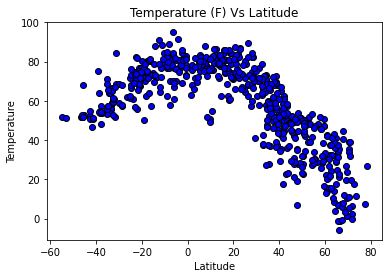

In [17]:
#Create Scatterplot for Temperature (F) Vs Latitude

plt.scatter(weather_df['Latitude'], weather_df['Temperature (F)'], marker='o', facecolors="blue", edgecolors="black" )
plt.title('Temperature (F) Vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Temperature')

Text(0, 0.5, 'Humidity')

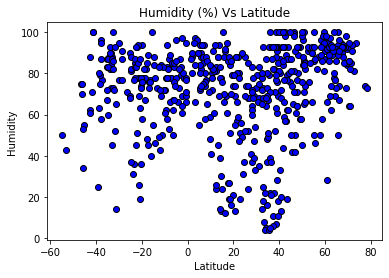

In [19]:
#Create Scatterplot for Humidity (%) vs. Latitude

plt.scatter(weather_df['Latitude'], weather_df['Humidity (%)'], marker='o', facecolors="blue", edgecolors="black" )
plt.title('Humidity (%) Vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

Text(0, 0.5, 'Cloudiness')

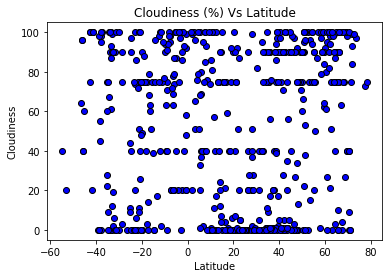

In [20]:
#Create Scatterplot for Cloudiness (%) vs. Latitude

plt.scatter(weather_df['Latitude'], weather_df['Cloudiness (%)'], marker='o', facecolors="blue", edgecolors="black" )
plt.title('Cloudiness (%) Vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

Text(0, 0.5, 'Wind Speed')

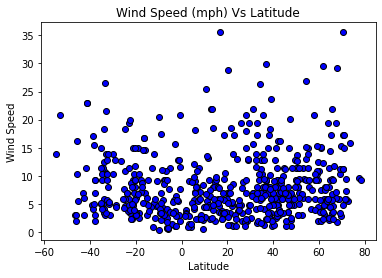

In [21]:
#Create Scatterplot for Wind Speed (mph) vs. Latitude

plt.scatter(weather_df['Latitude'], weather_df['Wind Speed (mph)'], marker='o', facecolors="blue", edgecolors="black" )
plt.title('Wind Speed (mph) Vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

In [ ]:
#Create Linear Regression for Northern Hemisphere - Temperature (F) vs. Latitude

In [ ]:
#Create Linear Regression for Southern Hemisphere - Temperature (F) vs. Latitude

In [ ]:
#Create Linear Regression for Northern Hemisphere - Humidity (%) vs. Latitude

In [ ]:
#Create Linear Regression for Southern Hemisphere - Humidity (%) vs. Latitude

In [ ]:
#Create Linear Regression for Northern Hemisphere - Cloudiness (%) vs. Latitude

In [ ]:
#Create Linear Regression for Southern Hemisphere - Cloudiness (%) vs. Latitude

In [ ]:
#Create Linear Regression for Northern Hemisphere - Wind Speed (mph) vs. Latitude

In [ ]:
#Create Linear Regression for Southern Hemisphere - Wind Speed (mph) vs. Latitude